- overfitting - good accuracy on training data bad resutls on unseen data
- Regularization can help  us overcome overfitting
- underfitting - it typically results in low training accuracy. Since the model is too simple to capture the underlying patterns in the data, it struggles to perform well even on the training dataset

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [6]:
X, y = make_moons(100, noise=0.25,random_state=2)

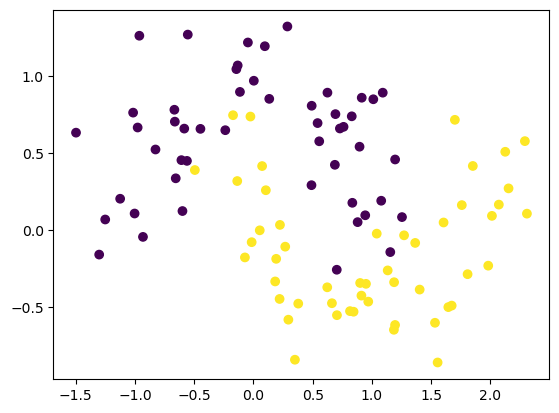

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [8]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ dense (Dense)                      │ (None, 128)                   │         384 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_1 (Dense)                    │ (None, 128)                   │      16,512 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_2 (Dense)                    │ (None, 1)                     │         129 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


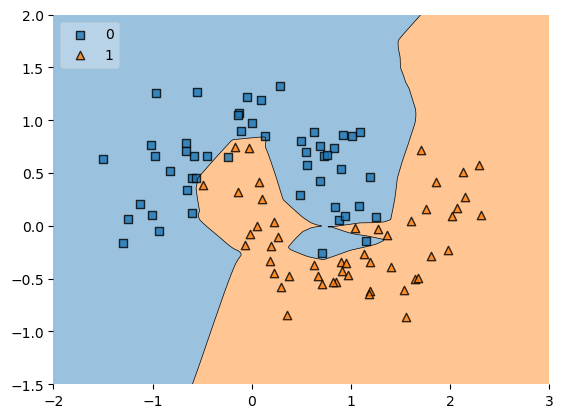

In [10]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

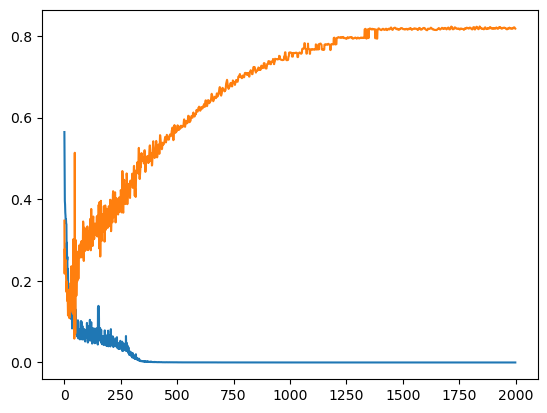

In [11]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [12]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ dense_3 (Dense)                    │ (None, 128)                   │         384 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_4 (Dense)                    │ (None, 128)                   │      16,512 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_5 (Dense)                    │ (None, 1)                     │         129 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


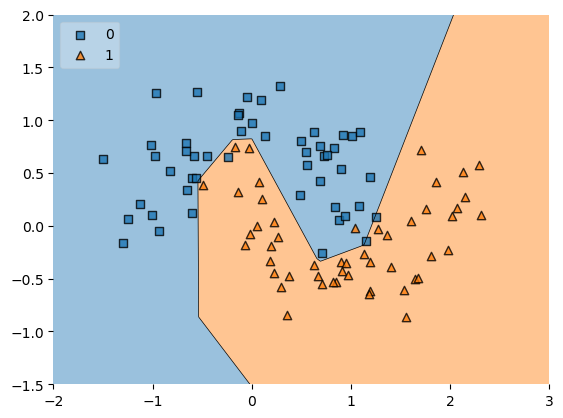

In [14]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

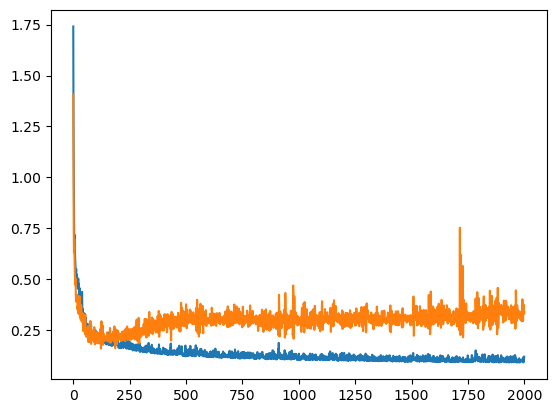

In [15]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [16]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

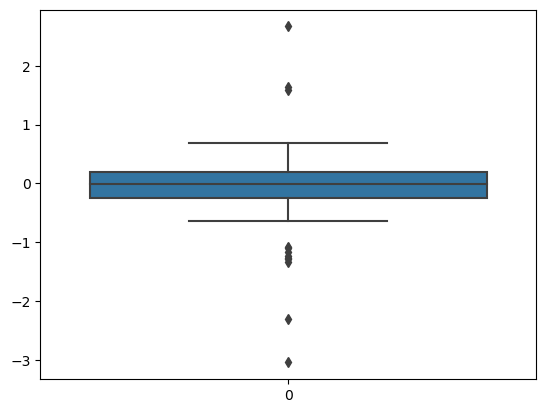

In [17]:
sns.boxplot(model1_weight_layer1)

<Axes: >

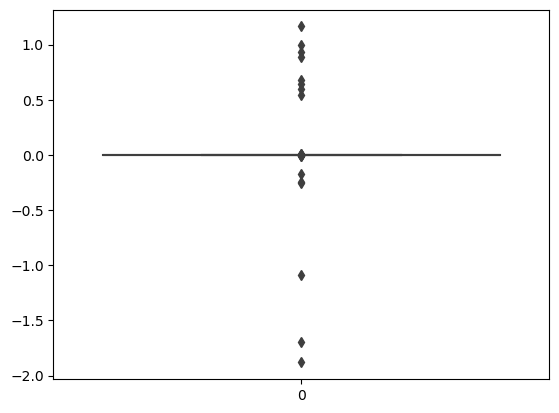

In [18]:
sns.boxplot(model2_weight_layer1)

In [19]:
model1_weight_layer1.min()

-3.046301

In [20]:
model2_weight_layer1.min()

-1.8808525

C:\Users\DELL\AppData\Local\Temp\ipykernel_4072\2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_4072\2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

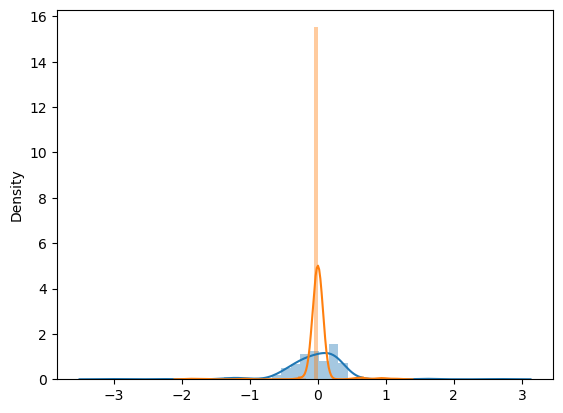

In [21]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [22]:
model1.get_weights()[0].reshape(256)

array([-3.29303920e-01, -4.53532040e-01, -4.72421318e-01, -2.80177742e-01,
        1.87947720e-01, -2.19512537e-01, -7.14923115e-03, -2.34973747e-02,
       -3.97174340e-03, -8.38890150e-02, -2.38951981e-01, -2.02457801e-01,
       -2.34705415e-02, -3.05981115e-02,  2.21956238e-01,  3.11897218e-01,
       -2.28237659e-01,  4.42997515e-01,  1.66072935e-01, -1.61698297e-01,
       -5.35541773e-01,  8.81491750e-02, -2.56486595e-01,  2.95716584e-01,
        2.04092249e-01,  2.35568464e-01, -7.93160647e-02,  8.23292360e-02,
       -4.88977402e-01,  9.26929712e-02, -1.90692768e-01,  7.87394047e-02,
       -2.42139652e-01, -4.90722597e-01, -3.35666627e-01,  2.10992292e-01,
        2.18278557e-01,  1.64821431e-01, -5.57917297e-01, -2.47395083e-01,
       -2.97132909e-01, -1.99134573e-01, -1.46792382e-01, -4.60539728e-01,
       -2.25024968e-01, -1.39222324e-01, -6.41102493e-02,  2.16528520e-01,
       -3.73476833e-01,  3.07342201e-01,  1.23267971e-01,  2.98679024e-01,
        2.54058927e-01,  